# Classification Models with Keras

## Import Keras and Packages


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented. 
# If you run this notebook on a different environment, e.g. your desktop, you may need to uncomment and install certain libraries.

#!pip install numpy==1.21.4
#!pip install pandas==1.3.4
#!pip install keras==2.1.6
#!pip install matplotlib==3.5.0

In [2]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [3]:
import matplotlib.pyplot as plt

In [4]:
# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

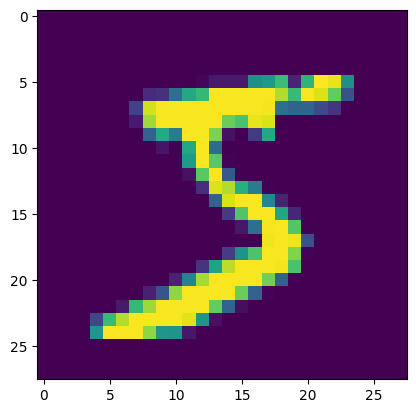

In [6]:
plt.imshow(X_train[0])

In [7]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

In [8]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [9]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


## Build a Neural Network


In [10]:
# define classification model
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## Train and Test the Network


In [ ]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10


c:\Users\nensipansuriya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 - 9s - 5ms/step - accuracy: 0.9433 - loss: 0.1869 - val_accuracy: 0.9673 - val_loss: 0.1015
Epoch 2/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9755 - loss: 0.0778 - val_accuracy: 0.9772 - val_loss: 0.0729
Epoch 3/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9832 - loss: 0.0532 - val_accuracy: 0.9769 - val_loss: 0.0779
Epoch 4/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9871 - loss: 0.0391 - val_accuracy: 0.9767 - val_loss: 0.0819
Epoch 5/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9903 - loss: 0.0305 - val_accuracy: 0.9800 - val_loss: 0.0746
Epoch 6/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9919 - loss: 0.0249 - val_accuracy: 0.9810 - val_loss: 0.0770
Epoch 7/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9930 - loss: 0.0214 - val_accuracy: 0.9796 - val_loss: 0.0916
Epoch 8/10
1875/1875 - 8s - 5ms/step - accuracy: 0.9942 - loss: 0.0187 - val_accuracy: 0.9793 - val_loss: 0.0878
Epoch 9/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9936 - loss: 0.0191 - val_accuracy: 0.9808 - val_loss: 0

In [ ]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))        

In [ ]:
model.save('classification_model.h5')

In [ ]:
from keras.models import load_model

In [ ]:
pretrained_model = load_model('classification_model.h5')